In [1]:
#make imports
import requests
from bs4 import BeautifulSoup
import csv

#setting up initial url parse and scrape
url = 'https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/inaugural-addresses'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

#find the table with links to the speeches
table =soup.find('table', class_="table")

#extract containers with links
links = table.find_all('a')
targets = []

#Iterate over list of containers to extract specific links
for link in links:
    site = link.get('href')
    targets.append(site)

#using the links from the targets list, go to each one and scrape that site for the date, text of the speech, and link
final_list =[]
for target in targets:
    webpage = requests.get(target)
    content = BeautifulSoup(webpage.content, 'html.parser')
    date = content.find('span', class_='date-display-single')
    texts = content.find('div', class_='field-docs-content')
    name = content.find('h3', class_='diet-title')
    name = name.text
    date = date.text
    texts = texts.text
    entry = [name, date, texts, target]
    final_list.append(entry)
#code if you were to want to make a csv of the resulting data
#note there may be an error for william henry harrison(go figure) that results in odd formatting
#formatting is fine in list format and converts to dataframe fine
#fields = ['name','date', 'speech', 'link']
#filename = 'inaugural addresses v3.csv'
#with open(filename, 'w', newline ='') as csvfile:
    # creating a csv writer object
 #   csvwriter = csv.writer(csvfile)
    # writing the fields
 #   csvwriter.writerow(fields)
    # writing the data rows
  #  csvwriter.writerows(final_list)

In [2]:
import pandas as pd
df = pd.DataFrame(final_list)
df

,0,1,2,3
0,George Washington,"April 30, 1789",\nFellow-Citizens of the Senate and of the Hou...,https://www.presidency.ucsb.edu/ws/index.php?p...
1,George Washington,"March 04, 1793",\nFellow Citizens:\nI AM again called upon by ...,https://www.presidency.ucsb.edu/ws/index.php?p...
2,John Adams,"March 04, 1797","\nWHEN it was first perceived, in early times,...",https://www.presidency.ucsb.edu/ws/index.php?p...
3,Thomas Jefferson,"March 04, 1801",\nFriends and Fellow-Citizens:\nCALLED upon to...,https://www.presidency.ucsb.edu/ws/index.php?p...
4,Thomas Jefferson,"March 04, 1805","\nPROCEEDING, fellow-citizens, to that qualifi...",https://www.presidency.ucsb.edu/ws/index.php?p...
5,James Madison,"March 04, 1809",\nUnwilling to depart from examples of the mos...,https://www.presidency.ucsb.edu/ws/index.php?p...
6,James Madison,"March 04, 1813",\nAbout to add the solemnity of an oath to the...,https://www.presidency.ucsb.edu/ws/index.php?p...
7,James Monroe,"March 04, 1817",\nI should be destitute of feeling if I was no...,https://www.presidency.ucsb.edu/ws/index.php?p...
8,James Monroe,"March 04, 1821",\nFellow-Citizens:\nI shall not attempt to des...,https://www.presidency.ucsb.edu/ws/index.php?p...
9,John Quincy Adams,"March 04, 1825",\nIn compliance with an usage coeval with the ...,https://www.presidency.ucsb.edu/ws/index.php?p...


In [3]:
import pandas as pd
import nltk
import re
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.columns = ['name','date', 'speech', 'link']
print(df.head())

                name            date  \
0  George Washington  April 30, 1789   
1  George Washington  March 04, 1793   
2         John Adams  March 04, 1797   
3   Thomas Jefferson  March 04, 1801   
4   Thomas Jefferson  March 04, 1805   

                                              speech  \
0  \nFellow-Citizens of the Senate and of the Hou...   
1  \nFellow Citizens:\nI AM again called upon by ...   
2  \nWHEN it was first perceived, in early times,...   
3  \nFriends and Fellow-Citizens:\nCALLED upon to...   
4  \nPROCEEDING, fellow-citizens, to that qualifi...   

                                                link  
0  https://www.presidency.ucsb.edu/ws/index.php?p...  
1  https://www.presidency.ucsb.edu/ws/index.php?p...  
2  https://www.presidency.ucsb.edu/ws/index.php?p...  
3  https://www.presidency.ucsb.edu/ws/index.php?p...  
4  https://www.presidency.ucsb.edu/ws/index.php?p...  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
speech_matrix =  vectorizer.fit_transform([x for x in df["speech"]])
print(speech_matrix)


  (0, 3337)	0.018333968012109694
  (0, 1364)	0.028538904520708785
  (0, 5593)	0.3722853147891557
  (0, 8159)	0.6082407959935502
  (0, 7301)	0.014050583509760508
  (0, 447)	0.2516858466180208
  (0, 4043)	0.030205582597805123
  (0, 6856)	0.024848600114816707
  (0, 436)	0.0067816112193386765
  (0, 8802)	0.01722882940324153
  (0, 4245)	0.016420547229094307
  (0, 8264)	0.2516858466180208
  (0, 4885)	0.006217254660186273
  (0, 5476)	0.04339425483985186
  (0, 3021)	0.029100676323494654
  (0, 1893)	0.02440057976160786
  (0, 3896)	0.0629214616545052
  (0, 3365)	0.01722882940324153
  (0, 5134)	0.05238824317199216
  (0, 9048)	0.0906625135491395
  (0, 3766)	0.008789813912197438
  (0, 495)	0.019354867507580507
  (0, 8154)	0.03483475359013308
  (0, 8158)	0.09438219248175779
  (0, 8984)	0.19527414677933339
  :	:
  (57, 4379)	0.02346219915824574
  (57, 2506)	0.02346219915824574
  (57, 7056)	0.02346219915824574
  (57, 6656)	0.02346219915824574
  (57, 4641)	0.02346219915824574
  (57, 6535)	0.02346219915

In [6]:
print(speech_matrix.shape)

(58, 9154)


In [7]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 6 clusters and save as km
km = KMeans(n_clusters=6)

# Fit the k-means object with speech_matrix
km.fit(speech_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each speech
df["cluster"] = clusters

# Display number of speeches per cluster (clusters from 0 to 4)
df['cluster'].value_counts()

1    30
0    13
4     9
2     4
5     1
3     1
Name: cluster, dtype: int64

In [8]:
print(df.head())

                name            date  \
0  George Washington  April 30, 1789   
1  George Washington  March 04, 1793   
2         John Adams  March 04, 1797   
3   Thomas Jefferson  March 04, 1801   
4   Thomas Jefferson  March 04, 1805   

                                              speech  \
0  \nFellow-Citizens of the Senate and of the Hou...   
1  \nFellow Citizens:\nI AM again called upon by ...   
2  \nWHEN it was first perceived, in early times,...   
3  \nFriends and Fellow-Citizens:\nCALLED upon to...   
4  \nPROCEEDING, fellow-citizens, to that qualifi...   

                                                link  cluster  
0  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
1  https://www.presidency.ucsb.edu/ws/index.php?p...        3  
2  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
3  https://www.presidency.ucsb.edu/ws/index.php?p...        1  
4  https://www.presidency.ucsb.edu/ws/index.php?p...        1  


In [9]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(speech_matrix)
print(similarity_distance.shape)
print(similarity_distance)

(58, 58)
[[-1.33226763e-15  3.80072419e-01  1.75454997e-01 ...  2.93688648e-01
   3.51788312e-01  3.95978560e-01]
 [ 3.80072419e-01 -2.22044605e-16  3.82472888e-01 ...  5.01403473e-01
   5.33713701e-01  5.67169896e-01]
 [ 1.75454997e-01  3.82472888e-01  4.44089210e-16 ...  2.41432398e-01
   2.96305550e-01  3.40483325e-01]
 ...
 [ 2.93688648e-01  5.01403473e-01  2.41432398e-01 ...  1.11022302e-16
   1.35055888e-01  2.12638899e-01]
 [ 3.51788312e-01  5.33713701e-01  2.96305550e-01 ...  1.35055888e-01
   1.11022302e-16  2.31446086e-01]
 [ 3.95978560e-01  5.67169896e-01  3.40483325e-01 ...  2.12638899e-01
   2.31446086e-01  1.11022302e-16]]


['George Washington April 30, 1789', 'George Washington March 04, 1793', 'John Adams March 04, 1797', 'Thomas Jefferson March 04, 1801', 'Thomas Jefferson March 04, 1805', 'James Madison March 04, 1809', 'James Madison March 04, 1813', 'James Monroe March 04, 1817', 'James Monroe March 04, 1821', 'John Quincy Adams March 04, 1825', 'Andrew Jackson March 04, 1829', 'Andrew Jackson March 04, 1833', 'Martin van Buren March 04, 1837', 'William Henry Harrison March 04, 1841', 'James K. Polk March 04, 1845', 'Zachary Taylor March 05, 1849', 'Franklin Pierce March 04, 1853', 'James Buchanan March 04, 1857', 'Abraham Lincoln March 04, 1861', 'Abraham Lincoln March 04, 1865', 'Ulysses S. Grant March 04, 1869', 'Ulysses S. Grant March 04, 1873', 'Rutherford B. Hayes March 05, 1877', 'James A. Garfield March 04, 1881', 'Grover Cleveland March 04, 1885', 'Benjamin Harrison March 04, 1889', 'Grover Cleveland March 04, 1893', 'William McKinley March 04, 1897', 'William McKinley March 04, 1901', 'The

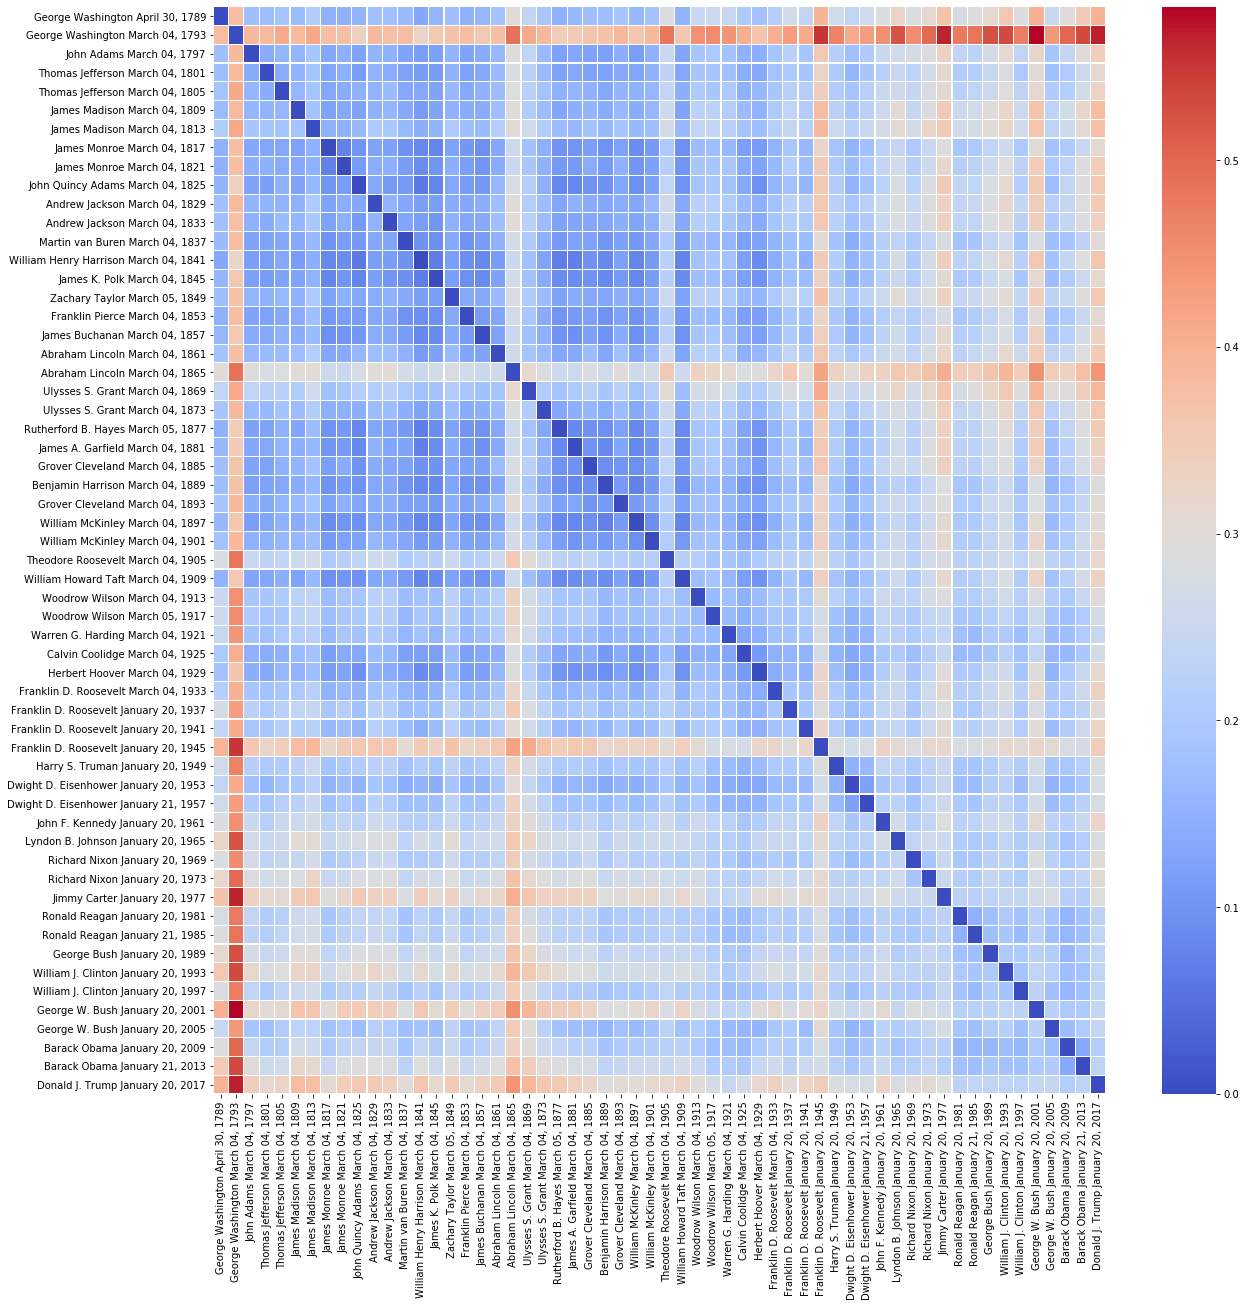

In [10]:
#make a heatmap to visually show the similarity distance
sim_df = pd.DataFrame(similarity_distance)
name_date = [x for x in df['name']+' ' +[y for y in df['date']]]
print(name_date)
sim_df.index = name_date
sim_df.columns = name_date
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sim_df, ax = ax, linewidth = 0.15, cmap = "coolwarm")
plt.show()

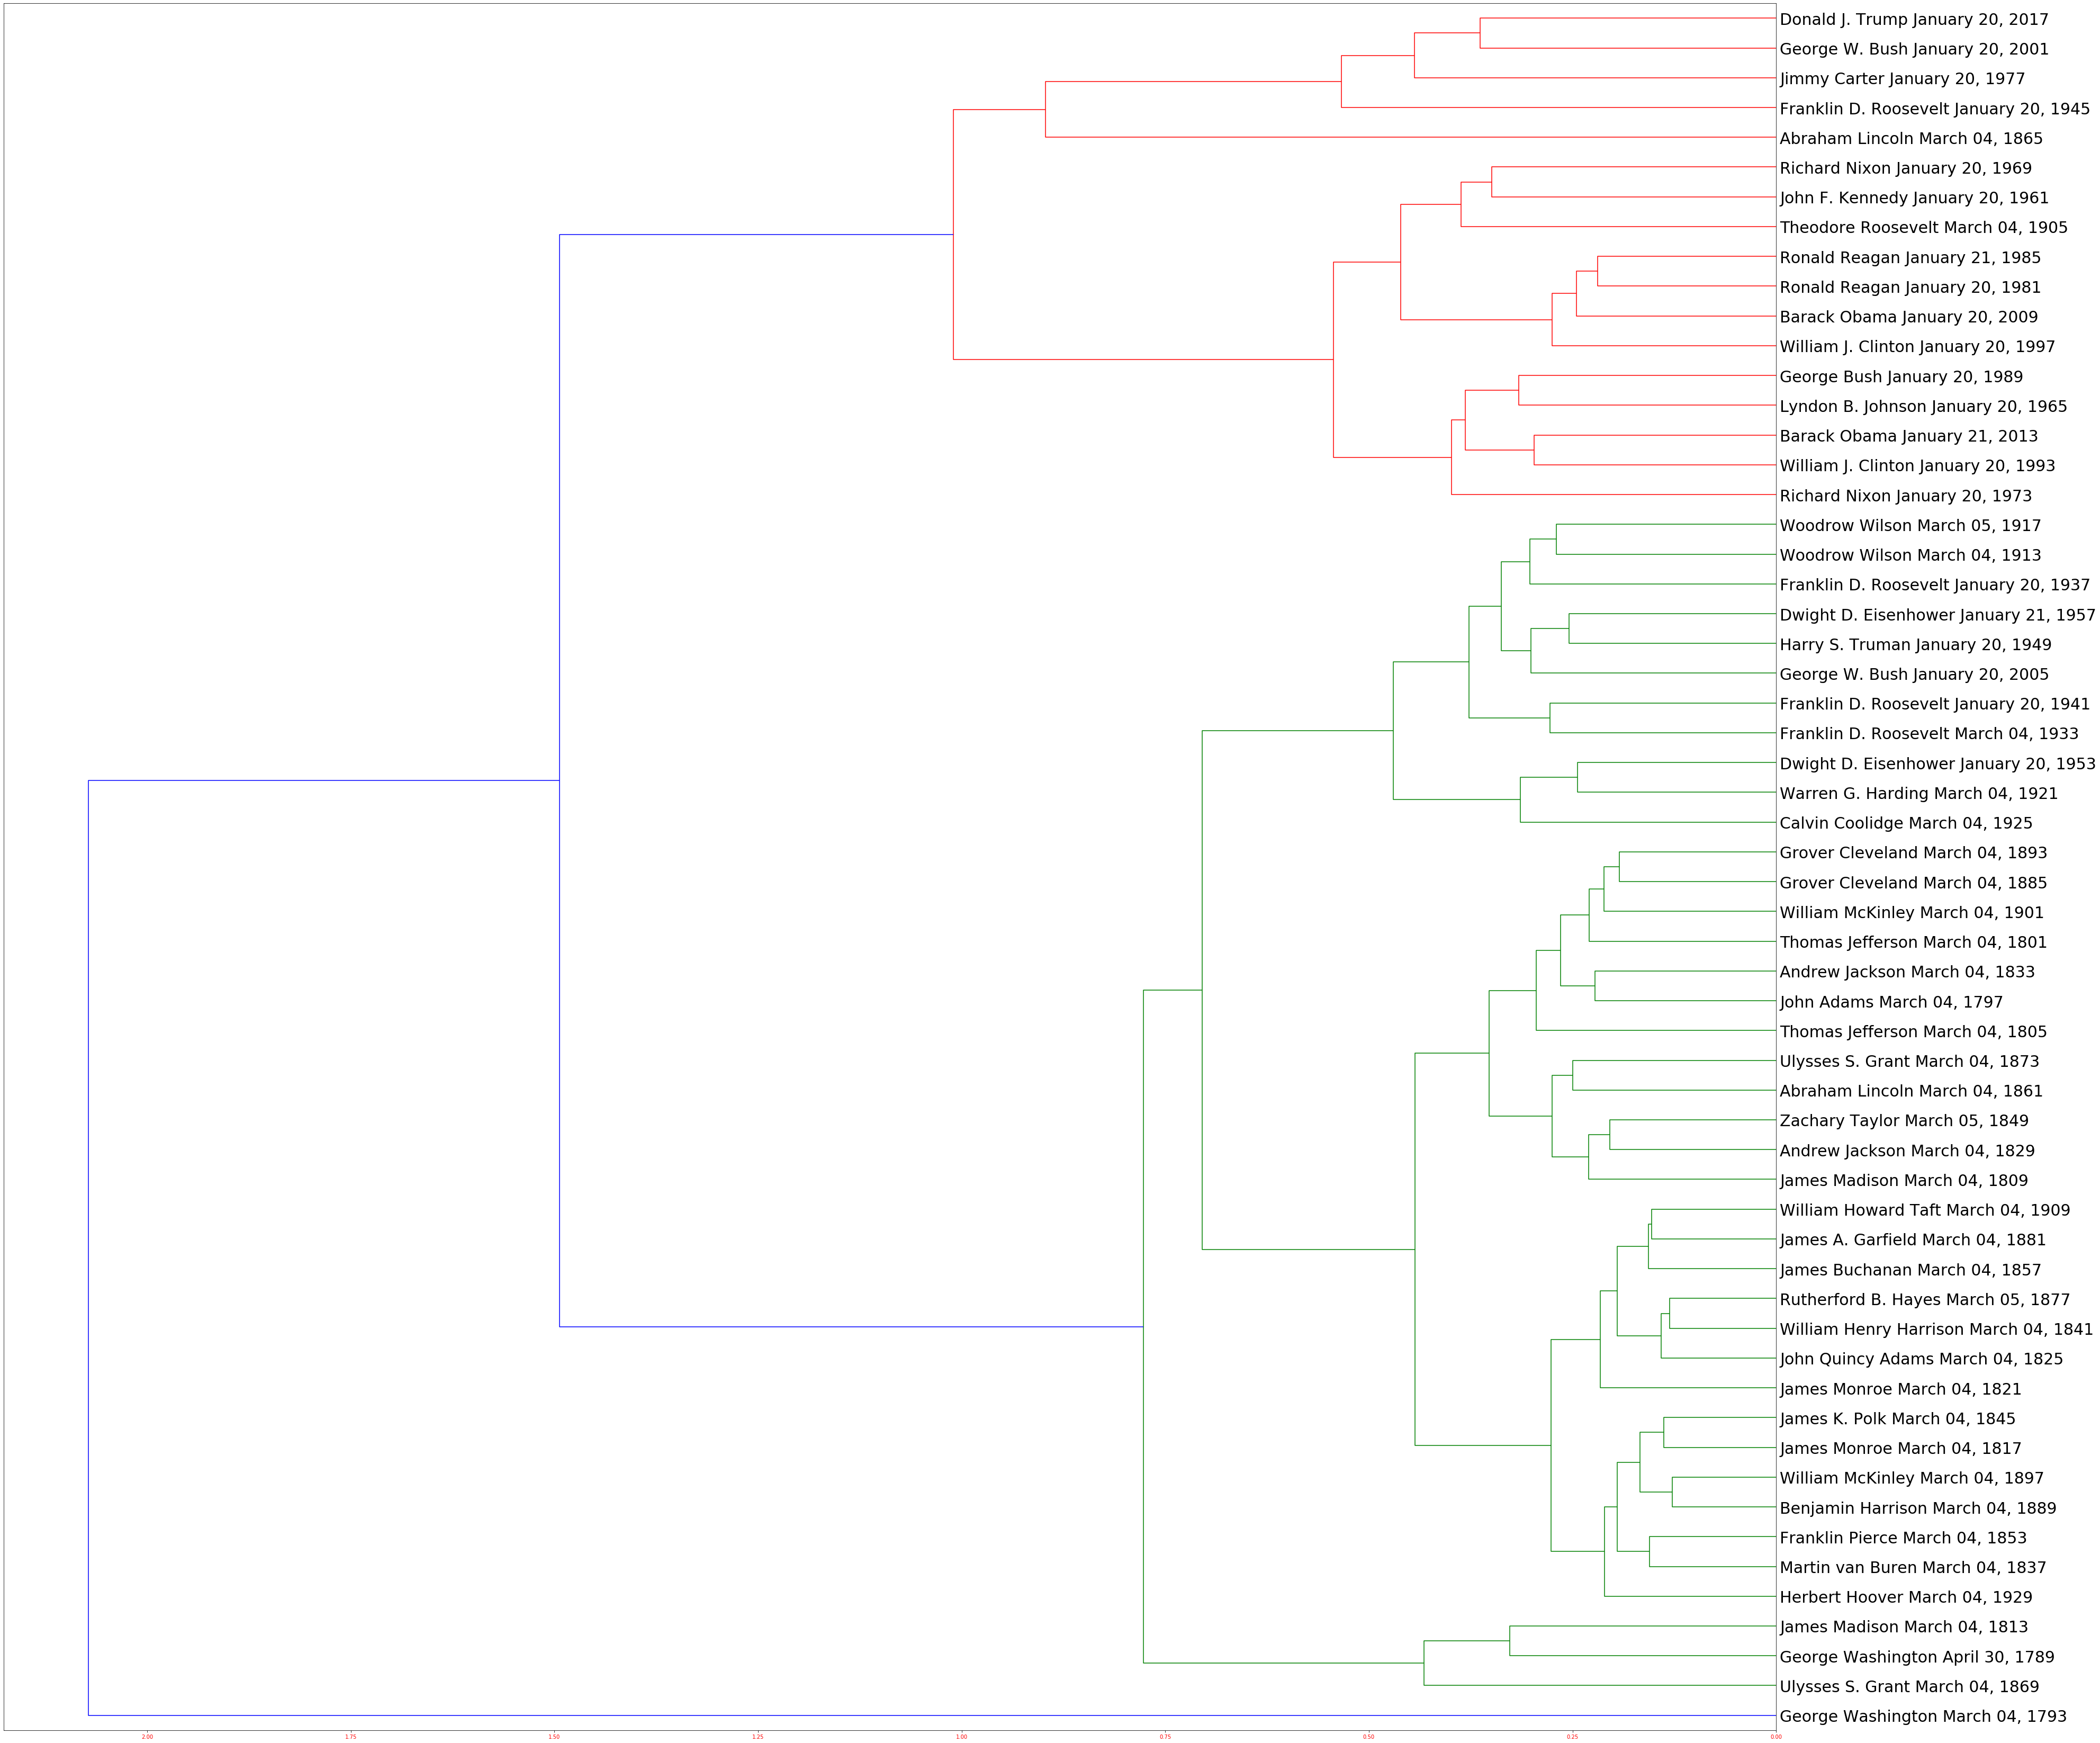

In [11]:
# Create mergings matrix
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings, orientation="left",
               labels=[x for x in df["name"]+ ' '+[y for y in df['date']]],
               #leaf_rotation=90
               leaf_font_size=30
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(60,60)

# Show the plotted dendrogram
plt.show()

In [12]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import pandas as pd

from nltk.stem import PorterStemmer
ps = PorterStemmer()



In [13]:
def word_display(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    dist = FreqDist(word_tokenize)
    stop_words = set(stopwords.words('english'))
    filtered = []
    stemmed = []
    for w in word_tokenize:
        if w not in stop_words:
            filtered.append(w)
    filtered_tags = nltk.pos_tag(filtered)
    for x in filtered_tags:
        if x[1] == 'PRP':
            filtered_tags.remove(x)
    final = []
    for x in filtered_tags:
        final.append(x[0])
    filtered_dist = FreqDist(final)
    filtered_dist.plot(20, cumulative = False)

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def word_display_stem(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    dist = FreqDist(word_tokenize)
    stop_words = set(stopwords.words('english'))
    filtered = []
    stemmed = []
    for w in word_tokenize:
        if w not in stop_words:
            filtered.append(w)
    filtered_tags = nltk.pos_tag(filtered)
    for x in filtered_tags:
        if x[1] == 'PRP':
            filtered_tags.remove(x)
    final = []
    for x in filtered_tags:
        final.append(x[0])
    for w in final:
        stemmed.append(ps.stem(w))
    filtered_dist = FreqDist(stemmed)
    filtered_dist.plot(20, cumulative = False)
    

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def word_display_lem(speech):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    dist = FreqDist(word_tokenize)
    stop_words = set(stopwords.words('english'))
    filtered = []
    lemmed = []
    for w in word_tokenize:
        if w not in stop_words:
            filtered.append(w)
    filtered_tags = nltk.pos_tag(filtered)
    for x in filtered_tags:
        if x[1] == 'PRP':
            filtered_tags.remove(x)
    final = []
    for x in filtered_tags:
        final.append(x[0])
    for w in final:
        lemmed.append(lem.lemmatize(w))
    filtered_dist = FreqDist(lemmed)
    filtered_dist.plot(20, cumulative = False)

In [16]:
import nltk 
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to C:\Users\NH-
[nltk_data]     DB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NH-DB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

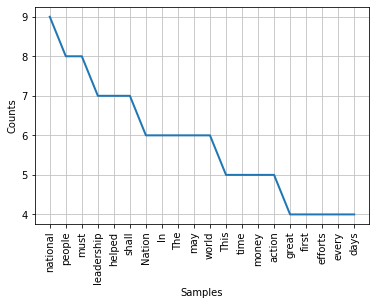

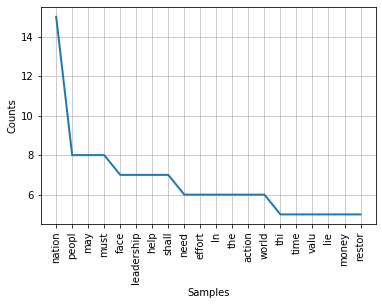

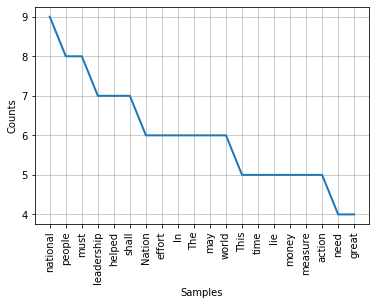

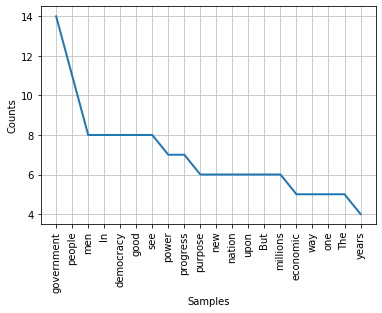

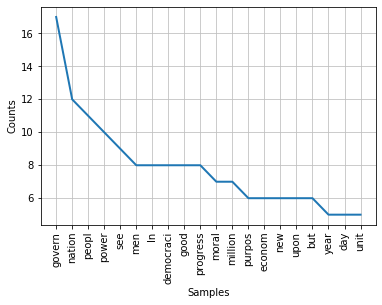

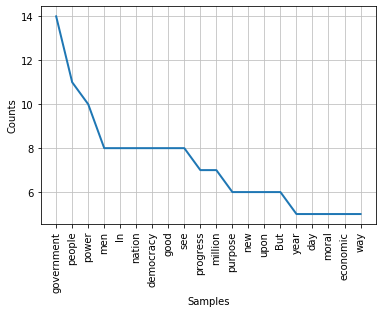

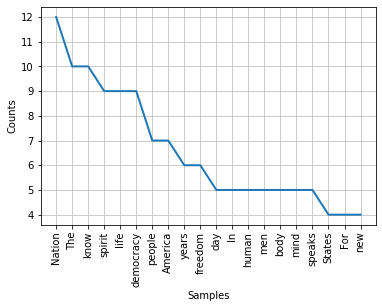

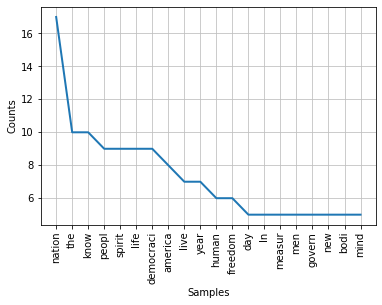

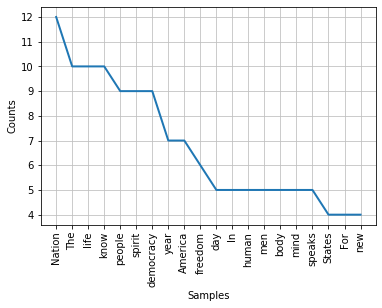

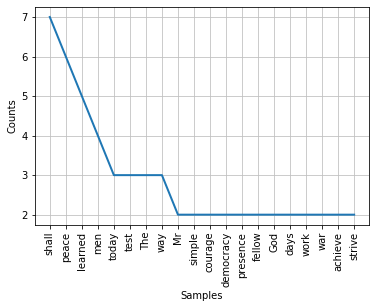

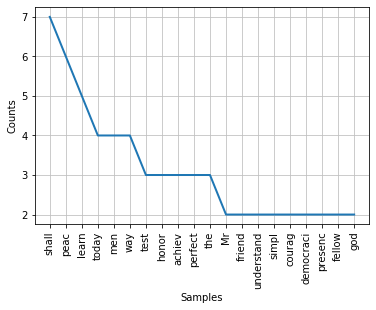

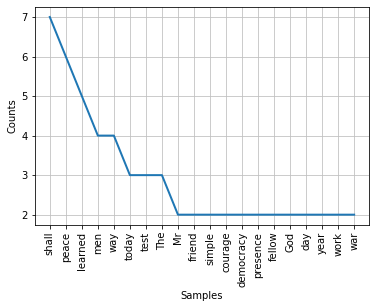

In [17]:
fdr = df[df['name']=='Franklin D. Roosevelt']
for speech in fdr['speech']:
    word_display(speech)
    word_display_stem(speech)
    word_display_lem(speech)


In [ ]:
for speech in fdr['speech']:
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokenize = tokenizer.tokenize(speech)
    stop_words = set(stopwords.words('english'))
    filtered = []
    for w in word_tokenize:
        if w not in stop_words:
            filtered.append(w)
    filtered_tags = nltk.pos_tag(filtered)
    for x in filtered_tags:
        if x[1] == 'PRP':
            filtered_tags.remove(x)
    print(len(filtered_tags))
    


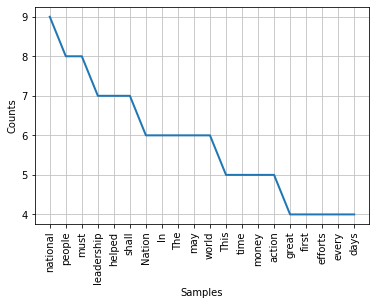

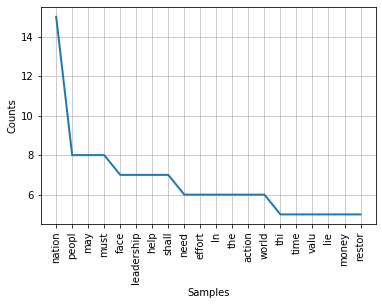

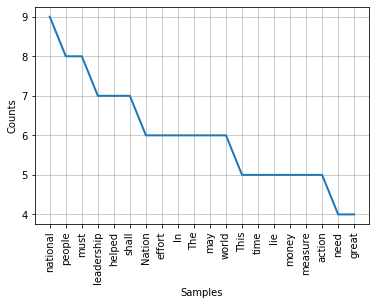

In [22]:
word_display(fdr['speech'].iloc[0])
word_display_stem(fdr['speech'].iloc[0])
word_display_lem(fdr['speech'].iloc[0])

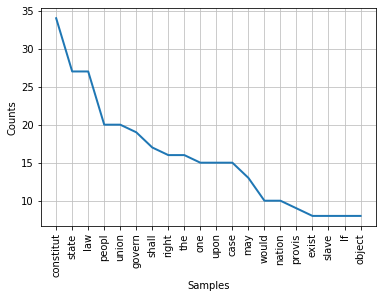

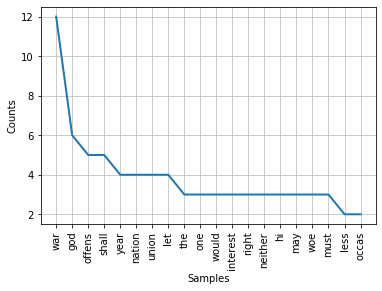

In [25]:
lincoln = df[df['name']=='Abraham Lincoln']
for speech in lincoln['speech']:
    word_display_stem(speech)


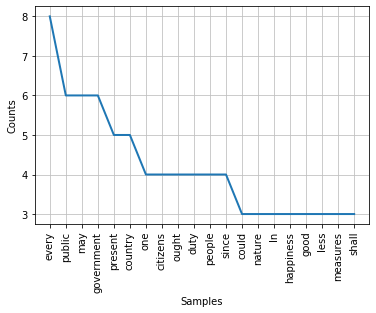

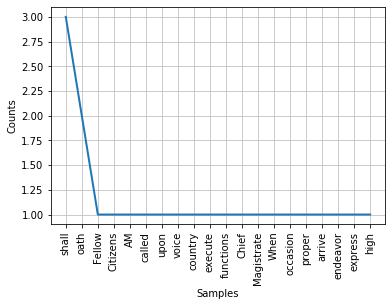

In [27]:
washington = df[df['name']=='George Washington']
for speech in washington['speech']:
    word_display(speech)

In [37]:
print(washington['speech'].iloc[1])
print("GW first inaugural address character length:\n", len(washington['speech'].iloc[0]))
print("GW second inaugural addresscharacter length:\n", len(washington['speech'].iloc[1]))



Fellow Citizens:
I AM again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.
Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.

GW first inaugural address character length:
 8625
GW second inaugural addresscharacter length:
 788
